## Install Libraries

In [38]:
%pip install tensorflow matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [39]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

## Load MNIST dataset

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Building LeNet-5 Neural Network

In [35]:
model = Sequential(layers=(
    Conv2D(6, kernel_size=(5,5),  activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax'))
)

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

/home/mirai/.pyenv/versions/3.12.2/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Fitting Training Data into Model

In [37]:
history = model.fit(X_train,
          y_train,
          batch_size=128,
          epochs=20,
          verbose=True,
          validation_data=(X_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9932 - loss: 0.0213 - val_accuracy: 0.9809 - val_loss: 0.0750
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9933 - loss: 0.0191 - val_accuracy: 0.9823 - val_loss: 0.0666
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accuracy: 0.9837 - val_loss: 0.0775
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.9846 - val_loss: 0.0724
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9834 - val_loss: 0.0805
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9841 - val_loss: 0.0829
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9784 - val_loss: 0.0926
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9946 - loss: 0.0185 - val_accu

## Visualizing Model Evaluation

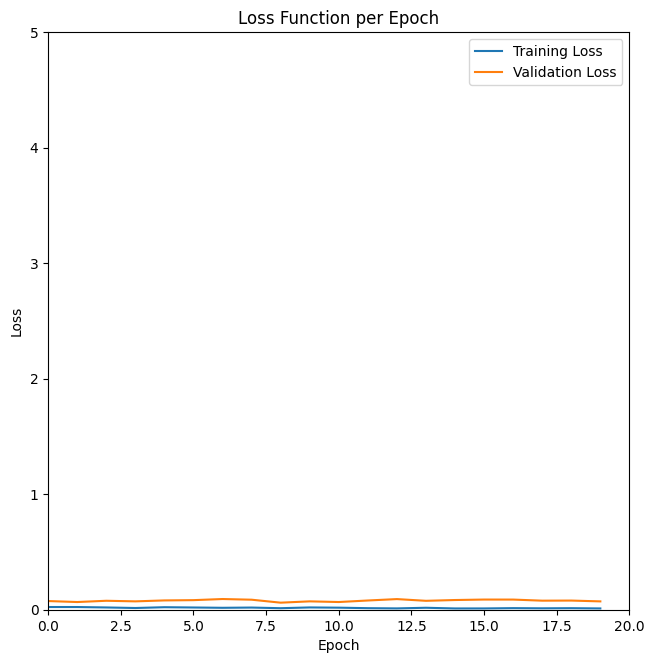

In [52]:
plt.figure(figsize=(7.5, 7.5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(0,20)
plt.ylim(0,5)
plt.legend()
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0825


[0.07218120992183685, 0.9882000088691711]